In [1]:
import numpy as np


In [2]:
import pandas as pd


In [3]:
from sklearn.metrics.pairwise import cosine_similarity

In [4]:
import matplotlib.pyplot as plt

In [12]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\hp\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [13]:

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [16]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\hp\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [17]:
from nltk.corpus import stopwords

In [18]:
import string

In [24]:
data=pd.read_csv("E:\ISHA PRGM\data science\jupyter\Myntra Kurtis\Myntra kurtis.csv")

In [25]:
print(data.head())

       Brand Name                                        Product URL  \
0  Rain & Rainbow  https://www.myntra.com/kurtis/rain--rainbow/ra...   
1        HERE&NOW  https://www.myntra.com/kurtis/herenow/herenow-...   
2           Anouk  https://www.myntra.com/kurtis/anouk/anouk-wome...   
3       Anubhutee  https://www.myntra.com/kurtis/anubhutee/anubhu...   
4           GERUA  https://www.myntra.com/kurtis/gerua/gerua-wome...   

                                               Image  Product Ratings  \
0  https://assets.myntassets.com/dpr_2,q_60,w_210...              4.2   
1  https://assets.myntassets.com/dpr_2,q_60,w_210...              4.2   
2  https://assets.myntassets.com/dpr_2,q_60,w_210...              4.2   
3  https://assets.myntassets.com/dpr_2,q_60,w_210...              4.3   
4  https://assets.myntassets.com/dpr_2,q_60,w_210...              4.2   

   Number of ratings                               Product Info  \
0                 28                  Printed Pure Cotton Kur

In [26]:
print(data.isnull().sum())

Brand Name             0
Product URL            0
Image                467
Product Ratings      198
Number of ratings      0
Product Info           0
Selling Price         74
Price                 74
Discount              74
dtype: int64


In [ ]:
# this data has some null values, but there are 467 null values in the image column, where the total no. of rows in the data is 600, so i will delete the image column and move furthrt

In [27]:
data=data.drop("Image",axis=1)

In [ ]:
# now drop the null values present in the other columns in the dataset

In [28]:
data=data.dropna()

In [ ]:
# now shape of the dataset will be

In [29]:
print(data.shape)

(364, 8)


In [ ]:
# so there are 364 rows present in the dataset after removing the null values. now lets move forward by looking at the brands that sell kurtis more on myntra

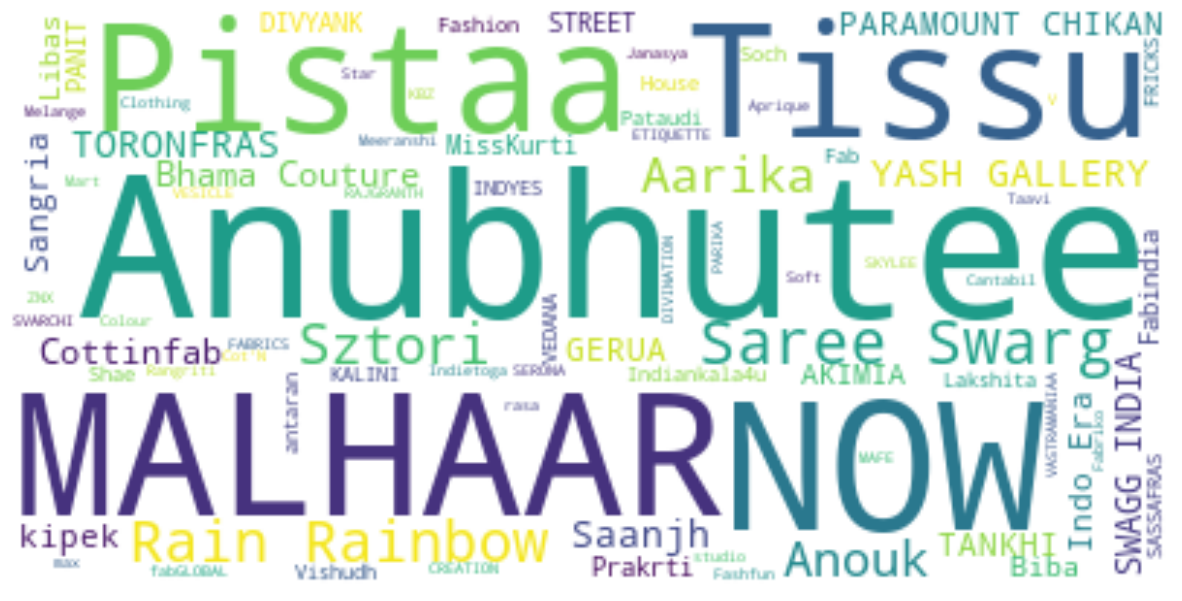

In [30]:
text = " ".join(i for i in data["Brand Name"])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# So, brands like Anubhutee, Malhaar, Now, Tissu, and Pistaa are popular for Kurtis on Myntra.

In [ ]:
# Now let’s have a look at the highest-rated Kurtis on Myntra

In [31]:
highest_rated = data.sort_values(by=["Product Ratings"], 
                                 ascending=False)
highest_rated = highest_rated.head(10)
print(highest_rated[['Product Info', "Product Ratings", "Brand Name"]])

                        Product Info  Product Ratings        Brand Name
435            Mandarin Collar Kurti              5.0            INDYES
249      Floral Printed Kaftan Kurta              5.0           Sangria
448          Solid Pure Cotton Kurti              5.0           MALHAAR
308             Floral Printed Kurti              5.0           MALHAAR
538                Pure Cotton Kurti              5.0           MALHAAR
277    Women Solid Embellished Kurti              5.0          Fabindia
515     Chikankari Embroidered Kurti              5.0  PARAMOUNT CHIKAN
62       Ethnic Motifs Printed Kurti              4.9              Biba
80   Ethnic Motifs Embroidered Kurti              4.8           Sangria
450      Self Striped Straight Kurti              4.8            Saanjh


In [ ]:
# So, brands like Indyes, Sangria, Malhaar, Fabindia, Paramount Chikan, Biba, and Saanjh are selling the highest-rated Kurtis on Myntra

In [ ]:
# mean rating (mr): the mean rating of all the products
# minimum ratings (m): minimum number of ratings
# number of ratings (n): total number of ratings of the product
# average ratings (a): average rating of the product

# score = (n/(n+m) * a) + (m/(m+n) * mr)

In [ ]:
# Now let’s calculate the weighted score and recommend the most trending Kurtis on Myntra

In [32]:
mr = data['Product Ratings'].mean()
m = data['Number of ratings'].quantile(0.9)
n = data['Number of ratings']
a = data['Product Ratings']
data["Score"]  = (n/(n+m) * a) + (m/(m+n) * mr)

recommendations = data.sort_values('Score', ascending=False)
print(recommendations[['Brand Name', 'Product Info',
                       'Product Ratings', 'Score', 
                       'Selling Price', 'Discount']].head(10))

         Brand Name                                       Product Info  \
48            Tissu                    Women Floral Print A-Line Kurti   
11        Anubhutee                        Ethnic Motifs Printed Kurti   
155       Anubhutee                                Women Printed Kurti   
66     YASH GALLERY                               Printed A-Line Kurti   
27        Anubhutee                       Women Printed Straight Kurti   
102          AKIMIA                      Embroidered Pure Cotton Kurti   
88            Tissu                Women Floral Printed Straight Kurti   
3         Anubhutee                        Ethnic Motifs Printed Kurti   
42   Rain & Rainbow  Women Printed Pure Cotton Pure Cotton A-Line K...   
18            GERUA                        Ethnic Motifs Printed Kurti   

     Product Ratings     Score  Selling Price   Discount  
48               4.4  4.338320          549.0  (45% OFF)  
11               4.4  4.300868          521.0  (70% OFF)  
155     